<a href="https://colab.research.google.com/github/PrasannaKumarPrabhu/pythonLearning/blob/main/LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 175MB/s]


In [3]:
cars = pd.read_csv("cars24-car-price-cleaned.csv")

In [4]:
cars.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [5]:
cars['model'].nunique()

3233

In [6]:
cars['model'].value_counts()

SWIFT DZIRE VDI              288
ALTO 800 LXI                 189
WAGON R VXI                  164
SWIFT VDI                    150
SWIFT DZIRE VXI              136
                            ... 
XUV300 W6 DIESEL               1
NANO STD BS IV                 1
FABIA 1.2 TDI ACTIVE           1
FIESTA PETROL STYLE            1
YARIS V OPTIONAL CVT BSIV      1
Name: model, Length: 3233, dtype: int64

In [7]:
cars.size

356760

In [8]:
#target variable encoding
cars['make'] = cars.groupby('make')['selling_price'].transform('mean')
cars['model'] = cars.groupby('model')['selling_price'].transform('mean')

In [9]:
cars.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [10]:
#normalisation(scaling)
#x-xmin/xmax-xmin
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cars1 = pd.DataFrame(scaler.fit_transform(cars), columns = cars.columns)
cars1

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.434413,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.191724,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.580027,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [11]:
#train test split
from sklearn.model_selection import train_test_split


In [12]:
y = cars1['selling_price']
x = cars1.drop('selling_price', axis=1)

In [13]:
x.shape,y.shape

((19820, 17), (19820,))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13874, 17), (5946, 17), (13874,), (5946,))

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
model.coef_

array([ 7.23382199e+11, -2.50488281e-01, -2.32558310e-01,  7.39953774e-02,
        4.68742062e-02,  7.23382199e+11,  6.61604471e-02,  8.58973267e-01,
       -7.18488746e-03, -7.03116019e-03,  6.98577387e-03,  1.32957359e-01,
        1.50077817e-02, -6.83704171e-03, -3.69616522e-03, -1.62563011e-02,
       -2.35725832e-02])

In [18]:
model.intercept_

-723382198910.7482

In [19]:
y_test_predict = model.predict(x_test)

In [20]:
y_test_predict

array([0.04602051, 0.21557617, 0.27380371, ..., 0.04528809, 0.13562012,
       0.50073242])

In [21]:
y_test

14690    0.050965
134      0.186871
4982     0.223274
11940    0.146099
10861    0.266958
           ...   
10638    0.300934
74       0.191724
18009    0.094649
19144    0.179590
19129    0.434413
Name: selling_price, Length: 5946, dtype: float64

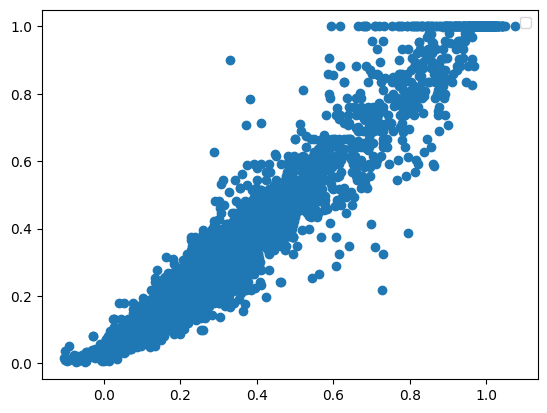

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test_predict, y_test)
plt.legend()
plt.show()

In [23]:
x1 = x[['model']]
x1_train = x_train[['model']]
x1_test = x_test[['model']]

In [24]:
model_s = LinearRegression()
model_s.fit(x1_train, y_train)

LinearRegression()

In [25]:
print(model_s.coef_)
print(model_s.intercept_)


[0.9967642]
0.0015237505846132926


In [26]:
y_hat = model_s.predict(x1_test)

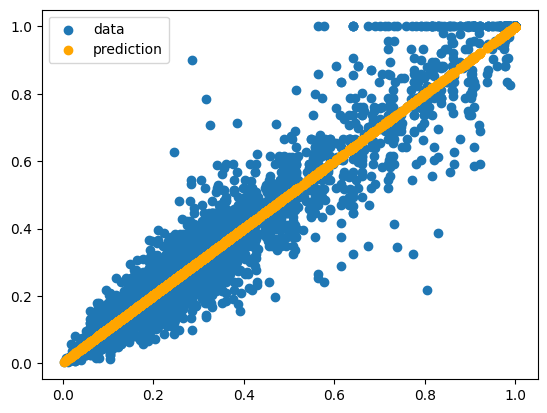

In [27]:

fig1 = plt.figure()
plt.scatter(x1_test, y_test, label = 'data')
plt.scatter(x1_test, y_hat, color='orange', label = 'prediction')
plt.legend()
plt.show()

In [28]:
model.score(x_test,y_test)

0.945987722055055

In [29]:
model_s.score(x1_test,y_test)

0.936879452106865

In [30]:
###feature Importance

In [31]:
model.coef_

array([ 7.23382199e+11, -2.50488281e-01, -2.32558310e-01,  7.39953774e-02,
        4.68742062e-02,  7.23382199e+11,  6.61604471e-02,  8.58973267e-01,
       -7.18488746e-03, -7.03116019e-03,  6.98577387e-03,  1.32957359e-01,
        1.50077817e-02, -6.83704171e-03, -3.69616522e-03, -1.62563011e-02,
       -2.35725832e-02])

In [32]:
model.score(x_test, y_test)

0.945987722055055

In [33]:
model.score(x_train, y_train)

0.9459004943250285